 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Matice-(matrix)" data-toc-modified-id="Matice-(matrix)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matice (matrix)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-matic" data-toc-modified-id="Použití-matic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Použití matic</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Pole-(array)" data-toc-modified-id="Pole-(array)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pole (array)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-polí" data-toc-modified-id="Použití-polí-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Použití polí</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Seznam-(list)" data-toc-modified-id="Seznam-(list)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seznam (list)</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/04/04.ipynb#Použití-seznamů" data-toc-modified-id="Použití-seznamů-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Použití seznamů</a></span></li></ul></li></ul></div>

# Datové struktury v R

Tato lekce se zaměřuje na to, co pravděpodobně budete potřebovat na začátku každé datové analýzy, tj. znát jaké možnosti reprezantace vašeho datového souboru vám R nabízí a jakou nejlépe zvolit.

V [předchozí lekci](../03/) jsme si již představili vektory, které představují asi nejpřímočařejší cestu k reprezentaci analyzovaných dat, neboť ve statistice nejsou jednolivá měření nebo vzorky nic víc než jen pouhá řada čísel. Někdy ale budete muset načíst i data strukturovaná trochu jinak (například vzorky měřené současně na několika přístrojích). V této lekci si tedy ukážeme další struktury, které na vektorech staví ale nabízí rozšířenou funkcionalitu pro pohodlnější práci s různými typy dat. 

## Matice (matrix)

S maticemi jste se určitě už setkali v matematice, takže víte, že to jsou vlastně vektory naskládané pod sebe. V R si můžete matice představit jako vektor, který má nevíc ještě dva atributy, kterými jsou počet řádek a počet sloupců. Že je tomu skutečně tak ukazuje následující kód, který pro přiřazení použíje funkci `dim`, která zajišťuje přístup k oběma atributům:

In [1]:
x <- 1:12
dim(x) <- c(4, 3) # převedení vektoru na matici

class(x)
x
attributes(x) # některé objekty v R mohou mít atributy, co přesně
dim(x)
nrow(x) # počet řádek
ncol(x) # počet sloupců

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

[1] 4 3

[1] 4

[1] 3

Toto je sice netradiční způsob vytvoření matice, ale ukazuje nám, co vlastně matice pro R znamená. V tomto případě je třeba vždy zadat počet řádků i počet sloupců, protože vlastně nastavujeme přímo konkrétní atribut výsledného vektoru. Použití funkce `matrix` už takové omezení nemá:

In [2]:
m_x <- matrix(x, nrow = 4)
dim(m_x)
class(m_x)
m_x
attributes(m_x)

[1] 4 3

[1] "matrix"

1,5,9
2,6,10
3,7,11
4,8,12


$dim
[1] 4 3

Tento postup je tedy čitelnější a o něco jednodušší, neboť rozdělení na sloupce již R vyřeší za vás. Stejného výsledku byste docíli i takto:

In [3]:
m_x <- matrix(x, ncol = 3)
print(m_x)
m_x <- matrix(x, nrow = 4, ncol=3)
print(m_x)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


Je třeba si též uvědomit, že rozdíl mezi použitím postupu s funkcí `matrix` oproti funkci `dim` je i v tom, že pomocí funkce `dim` je modifikován stávající objekt, ale funkce matrix vrací objekt nový. Při použití funkce `dim` tedy nedochází ke kopírování, což znamená rychlejší vykonávání, avšak za ztráty struktury původního objektu.

Jak jste si asi všimli, při vytváření matice z vektoru se postupuje podle sloupců nikoliv řádků. Pokud to chcete naopak můžete nastavit parametr `byrow` na `TRUE`:

In [4]:
m_x <- matrix(x, ncol = 3, byrow = T)
m_x

1,2,3
4,5,6
7,8,9
10,11,12


Matice lze vytvářet i přímo z vektorů pomocí funkce `as.matrix`. Výsledkem je pak jednorozměrná matice:

In [5]:
as.matrix(1:10)

1
2
3
4
5
6
7
8
9
10


V jednom z příkladů nahoře též vidíte, že funkce `print` vám kromě samotné matice ukáže navíc i další informace. Ty se týkají souřadnic (indexů) jednotlivých prvků. Je to v podstatě i návod, jak k jednotlivým prvkům přistupovat:

In [6]:
m_x[1,1]
m_x[2,2]
m_x[3,3]
m_x[4,3]

[1] 1

[1] 5

[1] 9

[1] 12

Pokud jeden z indexů vynecháte, dostanete vektor reprezentující celý řádek nebo sloupec:

In [7]:
m_x[,1]
m_x[1,]
m_x[-1,] # i negativní indexy fungují, jak by člověk čekal

[1]  1  4  7 10

[1] 1 2 3

4,5,6
7,8,9
10,11,12


Jako indexy můžete samozřejmě používat i vektory:

In [8]:
print(
    m_x[c(3, 4), 2:3] # numerické
)
print(
    m_x[c(F, F, T, T), c(F, T, T)] # nebo logické
)

     [,1] [,2]
[1,]    8    9
[2,]   11   12
     [,1] [,2]
[1,]    8    9
[2,]   11   12


nebo dokonce matice samotné:

In [9]:
print(m_x)
maska <- matrix(
    c(
        T, T, T,
        F, F, F,
        T, T, T,
        F, F, F
    )
    , nrow = 4
    , byrow = T
)
print(maska)
m_x[maska]

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
      [,1]  [,2]  [,3]
[1,]  TRUE  TRUE  TRUE
[2,] FALSE FALSE FALSE
[3,]  TRUE  TRUE  TRUE
[4,] FALSE FALSE FALSE


[1] 1 7 2 8 3 9

Všimněte si, že zde je výsledkem vektor čísel, která odpovídají vybraným hodnotám v naší masce a to opět podle sloupců.

Pokud z matice vybíráme pouze jednu dimenzi, R automaticky vrátí výsledek též jako vektor:

In [10]:
vyber <- m_x[1,]
vyber
class(vyber)
dim(vyber)

[1] 1 2 3

[1] "integer"

NULL

Pokud tomu chceme zamezit, můžeme funkci `[` specifikovat argument `drop`, který toto chování řídí (ano, `[` je funkce stejně jako všechny operace v R):

In [11]:
vyber <- m_x[1,, drop = F]
vyber
class(vyber)
dim(vyber)

1,2,3


[1] "matrix"

[1] 1 3

Do matic lze samozřejmě pomocí indexů i zapisovat:

In [12]:
print(m_x)
m_x[,1] <- c(1, 2, 3, 4) # nastav obsah prvniho sloupce na daný vektor
print(m_x)
m_x[,1] <- c(1, 2)
print(m_x) # i zde funguje recyklace hodnot vektoru

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    3    8    9
[4,]    4   11   12
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    8    9
[4,]    2   11   12


In [13]:
m_x[c(3, 4), 2:3] <- matrix(numeric(4), nrow = 2)
print(m_x)
m_x[c(3, 4), 2:3] <- c("a", "b", "c", "d") # je možné rovnoou i zapsat vektor správné délky
print(m_x)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    2    5    6
[3,]    1    0    0
[4,]    2    0    0
     [,1] [,2] [,3]
[1,] "1"  "2"  "3" 
[2,] "2"  "5"  "6" 
[3,] "1"  "a"  "c" 
[4,] "2"  "b"  "d" 


Všimněte si, že i matice mohou být pouze jednoho typu, stejně jako vektory. Po přiřazení vektoru dat jiného typu (zde `character`) se všechny prvky převedou na největší společný typ, tedy opět `character`.

Stejně jako s vektory je možné i s maticemi provádět různé operace. Například:

In [14]:
m_y <- matrix(1:4, nrow = 2, byrow = T)
m_y

print(
    m_y * 2
)
print(
    m_y > 2
)
print(
    m_y + m_y # sčítání
)
print(
    m_y * m_y # klasické násobení
)
print(
    m_y %*% m_y # maticové násobení
)
print(
    t(m_y) # transponovaná matice
)

1,2
3,4


     [,1] [,2]
[1,]    2    4
[2,]    6    8
      [,1]  [,2]
[1,] FALSE FALSE
[2,]  TRUE  TRUE
     [,1] [,2]
[1,]    2    4
[2,]    6    8
     [,1] [,2]
[1,]    1    4
[2,]    9   16
     [,1] [,2]
[1,]    7   10
[2,]   15   22
     [,1] [,2]
[1,]    1    3
[2,]    2    4


Stejně jako u vektorů lze jednotlivé řádky a sloupce v matici pojmenovávat:

In [15]:
colnames(m_y) <- c("první sloupec", "druhý sloupec")
rownames(m_y) <- c("první řádek", "druhý řádek")
attributes(m_y)
colnames(m_y)
rownames(m_y)
m_y

$dim
[1] 2 2

$dimnames
$dimnames[[1]]
[1] "první řádek" "druhý řádek"

$dimnames[[2]]
[1] "první sloupec" "druhý sloupec"

[1] "první sloupec" "druhý sloupec"

[1] "první řádek" "druhý řádek"

,první sloupec,druhý sloupec
první řádek,1,2
druhý řádek,3,4


### Použití matic

Matice je v podstatě tabulka, a proto se ve statistice nejčastěji používá k zakódování výsledků měření různých číselných proměnných (sloupce) pro řadu vzorků (řádky). Například následující matice kóduje nejrůznější data o třech lidech:

In [16]:
data <- matrix(
    c(
        0, 65, 20,
        1, 75, 19,
        0, 68, 21
    )
    , byrow = T
    , nrow = 3
)
colnames(data) <- c("pohlaví", "váha", "věk")
rownames(data) <- c(1:nrow(data))
data

,pohlaví,váha,věk
1,0,65,20
2,1,75,19
3,0,68,21


Asi vás napadlo, že matice má nevýhodu v tom, že všechny položky můsí být reprezentovány číselně, a tudíž je sloupec `pohlaví` nečitelný, neboť musíme vědět podle jakého klíče jsou hodnoty kódovány. Tento problém řeší datová struktura `data.frame`, která je rozšířením matic a představíme si ji za nedlouho.

Matice jsou též vhodné pro reprezentaci obrázků a podobných dat, neboť jednotlivé prvky mohou snadno reprezentovat barvu jednotlivých pixelů. Mezi testovacími daty, která jsou v R dostupná pod různými proměnnými, je například množina [volcano](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/volcano.html), která poskytuje topologická data o sopce Maunga Whau, která se nachází nedaleko od Aucklandu. Tuto matici si lze jako obrázek vykreslit například takto:

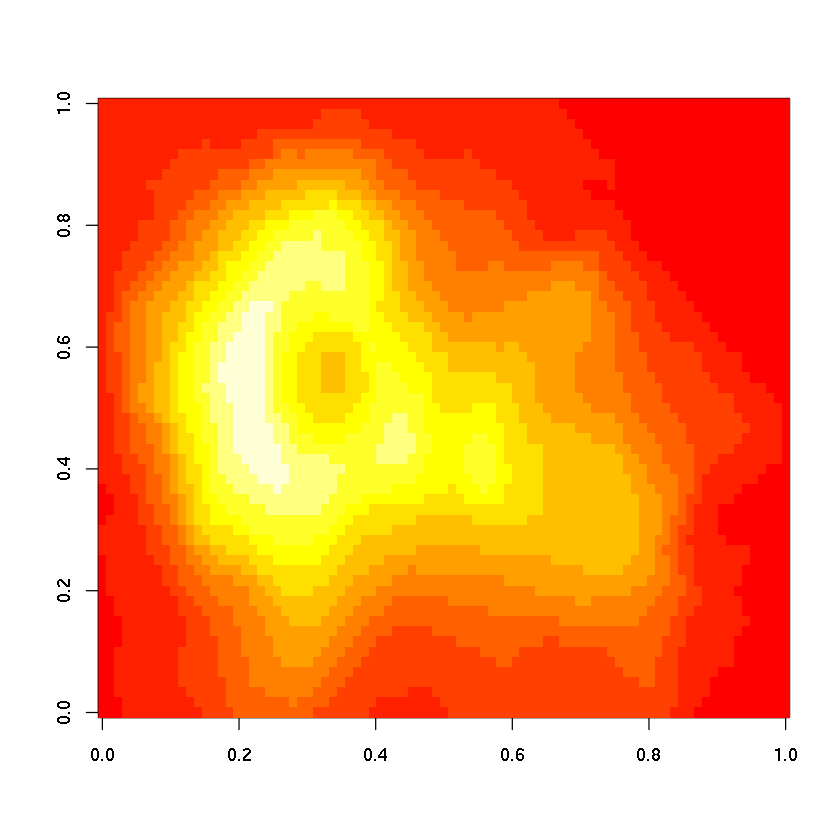

In [17]:
image(volcano)

## Pole (array)

Pole by se daly považovat za generalizaci matic, neboť je to vlastně $n$ vektorů, kde každý z nich tvoří jednu dimenzi. Při vytváření pole se tedy místo počtu řádků a sloupců uvádí rozměr každé dimenze (parametr `dim` funkce `array`):

In [18]:
ar_x <- array(1:24, dim = c(4,3,2))
print(ar_x)

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



Vytvořili jsme tedy třírozměrné pole, které má celkem 24 buněk rozdělených do 4 řádek v první dimenzi, tří ve druhé a dvou ve třetí. Jelikož lze v textovém výpisu zobrazit najednou pouze dvě dimenze, je tento rozdělen na několik částí reprezentujících různé kombinace prvních dvou dimenzí s ostatními (zde pouze se třetí). Jedná se tak tedy v podstatě o dvourozměrné řezy v různých vrstvách podle dalších dimenzí. Pro čtyřrozměrné pole, které si jen těžko představíme, pak výstup vypadá například takto:

In [19]:
ar_y <- array(1:48, dim = c(4,3,2,2))
print(ar_y)

, , 1, 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2, 1

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24

, , 1, 2

     [,1] [,2] [,3]
[1,]   25   29   33
[2,]   26   30   34
[3,]   27   31   35
[4,]   28   32   36

, , 2, 2

     [,1] [,2] [,3]
[1,]   37   41   45
[2,]   38   42   46
[3,]   39   43   47
[4,]   40   44   48



To, že se nejedná o matici ale o vícerozměrné pole, lze snadno ověřit funkcemi, které už známe:

In [20]:
class(ar_x)
nrow(ar_x)
ncol(ar_x)
dim(ar_x)
attributes(ar_x)

class(ar_y)
nrow(ar_y)
ncol(ar_y)
dim(ar_y)
attributes(ar_y)

[1] "array"

[1] 4

[1] 3

[1] 4 3 2

$dim
[1] 4 3 2

[1] "array"

[1] 4

[1] 3

[1] 4 3 2 2

$dim
[1] 4 3 2 2

Všimněte si, že funkce `nrow` a `ncol` i u polí fungují celkem intuitivně. Přistupování k jednotlivým prvkům a "podprostorům" pole je též v souladu s tím, co už jsme si ukázali:

In [21]:
print(ar_x)

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



In [22]:
print(ar_x[1,,])
print(ar_x[3,,])
print(ar_x[,2,])
print(ar_x[1,2,])
print(ar_x[1,2,2])

     [,1] [,2]
[1,]    1   13
[2,]    5   17
[3,]    9   21
     [,1] [,2]
[1,]    3   15
[2,]    7   19
[3,]   11   23
     [,1] [,2]
[1,]    5   17
[2,]    6   18
[3,]    7   19
[4,]    8   20
[1]  5 17
[1] 17


In [23]:
print(ar_x[1:3,,])

, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23



In [24]:
print(ar_x[,1:2,])

, , 1

     [,1] [,2]
[1,]    1    5
[2,]    2    6
[3,]    3    7
[4,]    4    8

, , 2

     [,1] [,2]
[1,]   13   17
[2,]   14   18
[3,]   15   19
[4,]   16   20



### Použití polí

Pole zřejmě nebudete používat tak často jako dvourozměrné matice, ale je dobré o nich vědět. Mohli bychom takto například snadno agregovat data o různých naměřených koncentracích různých látek pro skupinu vzorků za různých podmínek:

In [25]:
světlo_ano <- matrix(
    c(
        23, 11,
        19, 10,
        22, 12
    )
    , byrow = T
    , nrow = 3
)

světlo_ne <- matrix(
    c(
        31, 8,
        34, 9,
        29, 7
    )
    , byrow = T
    , nrow = 3
)

data <- array(
    data = c(
        světlo_ano
        , světlo_ne
    )
    , dim = c(3,2,2)
    , dimnames = list(
        c("vzorek1", "vzorek2", "vzorek3"),
        c("koncentrace_a", "koncentrace_b"),
        c("s_ano", "s_ne")
    )
)
print(data)

, , s_ano

        koncentrace_a koncentrace_b
vzorek1            23            11
vzorek2            19            10
vzorek3            22            12

, , s_ne

        koncentrace_a koncentrace_b
vzorek1            31             8
vzorek2            34             9
vzorek3            29             7



Díky tomu si pak můžeme snadno vygenerovat tabulku koncentrací při různých podmínkách pro jednotlivé vzorky:

In [26]:
print(data["vzorek1",,])
print(data["vzorek2",,])
print(data["vzorek3",,])

              s_ano s_ne
koncentrace_a    23   31
koncentrace_b    11    8
              s_ano s_ne
koncentrace_a    19   34
koncentrace_b    10    9
              s_ano s_ne
koncentrace_a    22   29
koncentrace_b    12    7


nebo koncentrace všech vzorků za světla:

In [27]:
print(data[,,"s_ano"])

        koncentrace_a koncentrace_b
vzorek1            23            11
vzorek2            19            10
vzorek3            22            12


Tato data by však šla reprezentovat i následující maticí:

In [28]:
data <- matrix(
    c(
        1, 23, 11,
        1, 19, 10,
        1, 22, 12,
        0, 31, 8,
        0, 34, 9,
        0, 29, 7
    )
    , byrow = T
    , ncol = 3
)
colnames(data) <- c("světlo", "koncentrace_a", "koncentrace_b")
rownames(data) <- c("vzorek1", "vzorek2", "vzorek3", "vzorek1", "vzorek2", "vzorek3")
data

,světlo,koncentrace_a,koncentrace_b
vzorek1,1,23,11
vzorek2,1,19,10
vzorek3,1,22,12
vzorek1,0,31,8
vzorek2,0,34,9
vzorek3,0,29,7


Obdobné tabulky bychom pak obdrželi následovně:

In [29]:
t(data[rownames(data) == "vzorek1",])

,vzorek1,vzorek1
světlo,1,0
koncentrace_a,23,31
koncentrace_b,11,8


In [30]:
data[data[,"světlo"] == 1, ]

,světlo,koncentrace_a,koncentrace_b
vzorek1,1,23,11
vzorek2,1,19,10
vzorek3,1,22,12


R vám tedy nabízí více možností jak reprezentovat data a je často jen na vás, abyste usoudili, co vám přijde vhodnější a srozumitelnější. Některé metody a funkce implementované v R však někdy vyžadují data ve specifickém tvaru a v takových případech nebudete mít větší možnost volby. Než tedy začnete načítat data, vždy se ujistěte jakým způsobem s nimi budete chtít pracovat a podle toho zvolte vhodnou reprezentaci.

## Seznam (list)

Nevýhodou vektorů je, že nemohou agregovat data různých typů, a proto existují seznamy, které tuto funkcionalitu umožňují. Následující seznam například agreguje nějaké informace o vzorku:

In [31]:
l_x <- list(
    compound_a = 25
    , compound_b = 12
    , measured_by = c("John Doe", "Jane Doe")
    , measured_on = "2016-07-01"
    , comments = c()
)
l_x

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
NULL


Krom samotných koncentrací je tedy pod jedním objektem uložena i informace o tom, kdo je zodpovědný za jeho měření a kdy bylo měření vykonáno. Je tak tedy možné krom dat samotných ukládat i tzv. metadata, tedy data o datech. Všimněte si též, že položkou může být i vektor. Do seznamu lze opravdu uložit téměř cokoliv (včetně seznamů samotných).

Přes jednotlivé pložky uložené v seznamu lze iterovat, například pomocí cylu `for`:

In [32]:
for (i in l_x) print(i)

[1] 25
[1] 12
[1] "John Doe" "Jane Doe"
[1] "2016-07-01"
NULL


Na jména jednotlivých položek se lze zeptat pomocí funkce `names`:

In [33]:
names(l_x)

[1] "compound_a"  "compound_b"  "measured_by" "measured_on" "comments"

Přistupovat k jednotlivým položkám pak lze pomocí těchto jmen a za použití dvou různých operátorů:

In [34]:
l_x$compound_a
l_x$measured_by
l_x[["compound_a"]]
l_x[["measured_by"]]

[1] 25

[1] "John Doe" "Jane Doe"

[1] 25

[1] "John Doe" "Jane Doe"

V těchto operátorech v podstatě není žádný rozdíl, ale druhá možnost pomocí řetězce a hranatých závorek je o něco flexibilnější, neboť umožňuje přistupovat k jednotlivým prvkům skrze proměnné. To by mohlo být užitečné například v následující funkci, která přiřazuje komentář k vybrané položce v seznamu v určitém formátu:

In [35]:
make_comment <- function(input_list, commented_field, comment_text) {
    cf_value <- input_list[commented_field]
    input_list$comments <- c(
                            input_list$comments, 
                            paste(
                                comment_text
                                , "; comment on "
                                , commented_field
                                , " with value "
                                , cf_value
                                , sep = "")
    )
    input_list
}
l_x <- make_comment(l_x, "compound_a", "můj komentář")
l_x

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
[1] "můj komentář; comment on compound_a with value 25"

Důvodem, proč je přístup k prvkům seznamu řešen pomocí specifických operátorů je ten, že klasický operátor `[` vrací pouze určitou podmnožinu seznamu, která je opět typu `list`. Díky tomu lze například v našem příkladu jednoduše vytvořit seznam bez komentářů:

In [36]:
l_x_no_comment <- l_x[!(names(l_x) %in% c("comments"))]
l_x_no_comment

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

Čili dvojitá forma `[[` se používa pouze k přístupu k hodnotě schované pod určitým jménem v seznamu, zatímco klasická forma `[` se většinou použije k výběru více prvků najednou.

Položky seznamu lze též snado přidávat a mazat:

In [37]:
l_x$sum <- l_x$compound_a + l_x$compound_b
l_x
length(l_x) # dotaz na počet položek seznamu lze snadno vykonat pomocí funkce `length`

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$comments
[1] "můj komentář; comment on compound_a with value 25"

$sum
[1] 37

[1] 6

In [38]:
l_x$comments <- NULL
l_x
length(l_x)

$compound_a
[1] 25

$compound_b
[1] 12

$measured_by
[1] "John Doe" "Jane Doe"

$measured_on
[1] "2016-07-01"

$sum
[1] 37

[1] 5

Pokud chcete převést seznam na vektor, lze tak rychle učinit funkcí `unlist`:

In [39]:
unlist(l_x)

compound_a   compound_b measured_by1 measured_by2  measured_on          sum 
        "25"         "12"   "John Doe"   "Jane Doe" "2016-07-01"         "37"

### Použití seznamů

Seznamy se v R nejčastěji používají jako návratové hodnoty funkcí, které mají více výsledků. Výhodné by to bylo například u následující funkce, které najednou počítá součet, součin, rozdíl a podíl dvou čísel:

In [40]:
spočítej <- function (a, b) {
    ret <- list()
    ret[["součet"]] <- a + b
    ret[["součin"]] <- a * b
    ret[["rozdíl"]] <- a - b
    ret[["podíl"]] <- a / b
    
    ret
}

spočítej(5, 3)

$součet
[1] 8

$součin
[1] 15

$rozdíl
[1] 2

$podíl
[1] 1.666667